Praktikum 1 (Pra Pengolahan Data-Data Terstruktur)

In [1]:
# Langkah 1

import pandas as pd # mengimpor libary pandas

data = 'Titanic-Dataset.csv' # digunakan untuk mengimpor file csv ke dalam file
df = pd.read_csv(data) # digunakan untuk membaca dengan menggunakan read

df.head() # membaca data teratas pada file yang sudah dipanggil.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Langkah 2

df.info() # digunakan untuk mengatahui tipe data dari kolom yang sudah ada

df.isnull().sum() # digunakan untuk mengetahui data yang hilang untuk setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Langkah 3

# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True) # mengisi nilai yang hilang pada kolom 'Age' dengan nilai rata-ratanya

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True) # mengisi value yang hilang oada kolom 'Cabin' dengan String "DECK"

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True) # mengisi nilai yang hilang pada kolom 'Embarked' dengan nilai modus dari kolom


In [12]:
# Langkah 4

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Praktikum 2 (Seleksi Fitur, Encoding, dan Standarisasi)

In [13]:
# Langkah 0

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
# Langkah 1 (Load Data)

dpath = 'Titanic-Dataset-fixed.csv' # digunakan untuk membaca file csv
df = pd.read_csv(dpath) # digunakan untuk membaca file csv dengan read_csv
df.head() # menampilkan data teratas dari csv 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


In [15]:
# Langkah 2 (Slice Data)

df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']] # memisahkan data yang sudah dipilih dari data mentahnya
df.head() # menampilkan data teratas yang sudah di slice

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,DECK
1,1,1,38.0,female,C85
2,1,3,26.0,female,DECK
3,1,1,35.0,female,C123
4,0,3,35.0,male,DECK


In [16]:
# Langkah 3 (Encoding)

le = LabelEncoder() # membuat objek dari LabelEncoder
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding

In [17]:
# Langkah 4 (Verifikasi Hasil)

df.head() # menampilkn kembali setelah di encoding data yang di encoding akan berubah nilai nya yaitu pada kolom 'Sex' dan 'Cabin' 

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,1,115
1,1,1,38.0,0,81
2,1,3,26.0,0,115
3,1,1,35.0,0,55
4,0,3,35.0,1,115


In [18]:
# Langkah 5 (Standarisasi)

std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

In [19]:
# Langkah 6 (Verifikasi Hasil Standarisasi) 

df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Praktikum 3 (Spliting Data)

Random Split

In [20]:
# Langkah 1 (Load Data)

import pandas as pd

df = pd.read_csv('Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [21]:
# Langkah 2 (Split Data)

# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
0    549
1    342
Name: Survived, dtype: int64
Jumlah label data train:
0    439
1    273
Name: Survived, dtype: int64
Jumlah label data val:
0    53
1    36
Name: Survived, dtype: int64
Jumlah label data test:
0    57
1    33
Name: Survived, dtype: int64


Stratified Splt

In [22]:
# Langkah 1 (Load Data)

import pandas as pd

df2 = pd.read_csv('Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [23]:
# Langkah 2 (Split Data)

# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
0    549
1    342
Name: Survived, dtype: int64
Jumlah label data train:
0    439
1    273
Name: Survived, dtype: int64
Jumlah label data val:
0    51
1    38
Name: Survived, dtype: int64
Jumlah label data test:
0    59
1    31
Name: Survived, dtype: int64


Cross Validation 1

In [24]:
# Langkah 1 (Load Data)

import pandas as pd

df3 = pd.read_csv('Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [25]:
# Langkah 2 (Split Data)

# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

Cross Validation 2

In [2]:
# Langkah 1 (Load Data)

import pandas as pd

df4 = pd.read_csv('Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [28]:
# Langkah 2 (Split Data)

# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

Praktikum 4 (Ekstraksi Fitur Data Tidak Terstruktur)

In [29]:
# Langkah 0 (Install Library)

%pip install Pillow

Note: you may need to restart the kernel to use updated packages.


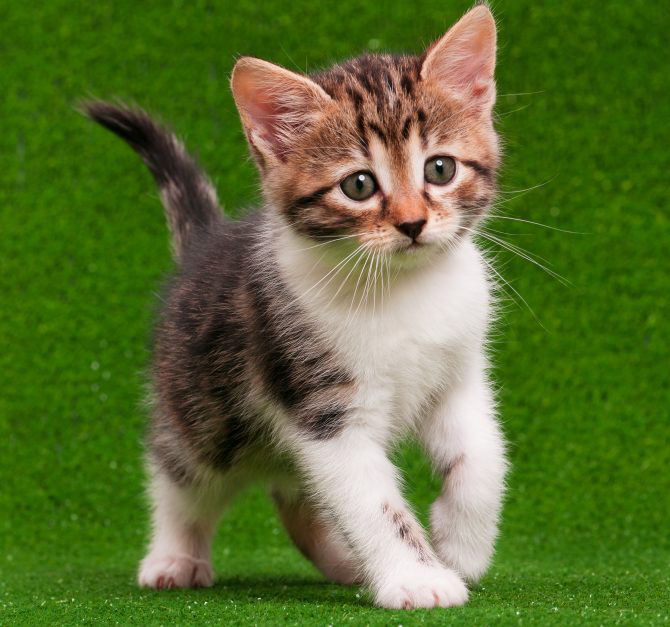

In [1]:
# Langkah 1 (Load Image)

from PIL import Image
 
img = Image.open('kitten01.jpg')
img.show() # tampilkan gambar
display(img)

In [32]:
# Langkah 2 (Ekstrak Fitur)

# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# Cetak fitur histogram pada channel red
print(r.histogram())

256
[43, 24, 38, 68, 93, 100, 112, 130, 125, 156, 146, 126, 143, 162, 156, 168, 167, 185, 187, 212, 227, 256, 288, 339, 345, 374, 395, 425, 465, 515, 544, 648, 792, 1016, 1245, 1529, 1921, 2533, 3275, 4182, 5224, 6444, 7561, 8666, 9789, 10762, 11591, 12244, 12603, 12946, 12851, 12383, 11899, 11390, 10258, 9209, 8259, 7561, 6796, 6148, 5635, 4959, 4493, 4248, 3799, 3571, 3255, 3051, 2921, 2648, 2474, 2438, 2141, 2037, 1893, 1817, 1783, 1695, 1583, 1568, 1479, 1430, 1357, 1367, 1343, 1269, 1184, 1174, 1121, 1112, 1100, 1023, 1008, 1023, 938, 919, 876, 881, 907, 878, 873, 820, 757, 758, 754, 731, 717, 761, 742, 640, 716, 755, 727, 590, 650, 654, 662, 621, 617, 570, 595, 597, 602, 611, 600, 610, 606, 617, 606, 629, 582, 601, 563, 598, 586, 622, 638, 605, 652, 614, 610, 622, 609, 627, 597, 616, 639, 647, 628, 627, 635, 614, 619, 635, 659, 656, 651, 632, 613, 665, 627, 657, 640, 653, 694, 666, 667, 636, 679, 700, 667, 660, 696, 759, 762, 775, 709, 716, 756, 764, 807, 803, 876, 819, 870, 941,

Tugas Praktikum 

Deskripsi Tugas
Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B). Tugas Anda adalah,
1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.
2. Lakukan proses encoding pada kolom "diagnosis".
3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.
4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

In [18]:
# Langkah 1 (Load Data)

import pandas as pd

read_tugas = pd.read_csv('wbc.csv')
read_tugas.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

In [19]:

read_tugas = read_tugas.drop(columns=['Unnamed: 32', 'id'])
read_tugas.head() # menampilkan data teratas yang sudah di slice

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2. Proses Encoding pada kolom 'diagnosis'

In [6]:
# Langkah 0 (import library)

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Langkah 1 (load data)


read = 'wbc.csv'
read_tugas = pd.read_csv(read)
read_tugas.head()


# Langkah 2 (slice data)

read_tugas = read_tugas[['diagnosis']]
read_tugas.head()

# Langkah 3 (encode data kolom diagnosis)

le = LabelEncoder() # membuat objek dari LabelEncoder
read_tugas['diagnosis'] = le.fit_transform(read_tugas['diagnosis']) # proses encoding

# Langkah 4 (varifikasi hasil)

read_tugas.head() 



,diagnosis
0,1
1,1
2,1
3,1
4,1


3. Melakukan proses standarisasi pada semua kolom numerik

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Menggunakan LabelEncoder untuk mengubah kolom diagnosis ke dalam bentuk numerik
label_encoder = LabelEncoder()
read_tugas['diagnosis'] = label_encoder.fit_transform(read_tugas['diagnosis'])

# Mengambil kolom-kolom numerik (kecuali 'diagnosis')
numeric_cols = read_tugas.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols[numeric_cols != 'diagnosis']

# Melakukan standarisasi pada kolom-kolom numerik
std = StandardScaler()
read_tugas[numeric_cols] = std.fit_transform(read_tugas[numeric_cols])

read_tugas.head()

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,-0.236405,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN
1,-0.236403,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN
2,0.431741,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN
3,0.432121,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN
4,0.432201,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN


4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

In [4]:
import pandas as pd

read_tugas = pd.read_csv('wbc.csv')

from sklearn.model_selection import train_test_split

diagnosis_only = read_tugas['diagnosis']
read_tugas_train, read_tugas_test = train_test_split(read_tugas, test_size=0.2, random_state=0, stratify=diagnosis_only)


print(f'Jumlah label data asli:\n{read_tugas.diagnosis.value_counts()}')
print(f'Jumlah label data train:\n{read_tugas_train.diagnosis.value_counts()}')
print(f'Jumlah label data test:\n{read_tugas_test.diagnosis.value_counts()}')

Jumlah label data asli:
B    357
M    212
Name: diagnosis, dtype: int64
Jumlah label data train:
B    285
M    170
Name: diagnosis, dtype: int64
Jumlah label data test:
B    72
M    42
Name: diagnosis, dtype: int64
